In [5]:
import pandas as pd
import numpy as np
import string
import os
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\张馨予\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Step 1: Import data

In [73]:
df = pd.read_csv("yelp.csv",dtype = 'object', nrows=10000)

In [7]:
df.head()

,Unnamed: 0,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,...,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id
0,0,False,Breakfast & Brunch; Restaurants,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,NaN,...,331,Jason,376,user,1034,5,My wife took me here on my birthday for breakf...,review,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,1,False,Italian; Pizza; Restaurants,Phoenix,"4848 E Chandler Blvd\nPhoenix, AZ 85044",ZRJwVLyzEJq1VAihDhYiow,33.3056067,-111.9787576,Spinato's Pizzeria,NaN,...,2,Paul,2,user,0,5,I have no idea why some people give bad review...,review,0,0a2KyEL0d3Yb1V6aivbIuQ
2,2,False,Middle Eastern; Restaurants,Tempe,"1513 E Apache Blvd\nTempe, AZ 85281",6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,NaN,...,0,Nicole,3,user,3,4,love the gyro plate. Rice is so good and I als...,review,1,0hT2KtfLiobPvh6cDC8JQg
3,3,False,Active Life; Dog Parks; Parks,Scottsdale,"5401 N Hayden Rd\nScottsdale, AZ 85250",_1QQZuf4zZOyFCvXc0o6Vg,33.5229446452242,-111.907886266708,Chaparral Dog Park,NaN,...,18,lindsey,31,user,75,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,2,uZetl9T0NcROGOyFfughhg
4,4,False,Tires; Automotive,Mesa,"1357 S Power Road\nMesa, AZ 85206",6ozycU1RpktNG2-1BroVtw,33.3910269,-111.6844821,Discount Tire,NaN,...,3,Roger,28,user,32,5,General Manager Scott Petello is a good egg!!!...,review,0,vYmM4KTsC8ZfQBg-j5MWkw


In [8]:
#Count the number of reviews with stars from 1 to 5

df['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

# Step 2: Data preprocessing (Sentiment Intensity Analysis)

In [9]:
import csv
import nltk
import string
import numpy as np
from nltk.corpus import stopwords
import matplotlib.pyplot as plt 
from collections import Counter   
from math import log
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\张馨予\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
# Remove irrelavant columns 

df_text = df[['review_id', 'text']]

In [11]:
# Transfer the type of text into 'string'

df_text.astype(str)

,review_id,text
0,fWKvX83p0-ka4JS3dc6E5A,My wife took me here on my birthday for breakf...
1,IjZ33sJrzXqU-0X6U8NwyA,I have no idea why some people give bad review...
2,IESLBzqUCLdSzSqm0eCSxQ,love the gyro plate. Rice is so good and I als...
3,G-WvGaISbqqaMHlNnByodA,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,1uJFq2r5QfJG_6ExMRCaGw,General Manager Scott Petello is a good egg!!!...
...,...,...
9995,Ubyfp2RSDYW0g7Mbr8N3iA,First visit...Had lunch here today - used my G...
9996,2XyIOQKbVFb6uXQdJ0RzlQ,Should be called house of deliciousness!\n\nI ...
9997,jyznYkIbpqVmlsZxSDSypA,I recently visited Olive and Ivy for business ...
9998,5UKq9WQE1qQbJ0DJbc-B6Q,My nephew just moved to Scottsdale recently so...


In [12]:
df_text.dtypes

review_id    object
text         object
dtype: object

In [13]:
df_text[:5]

,review_id,text
0,fWKvX83p0-ka4JS3dc6E5A,My wife took me here on my birthday for breakf...
1,IjZ33sJrzXqU-0X6U8NwyA,I have no idea why some people give bad review...
2,IESLBzqUCLdSzSqm0eCSxQ,love the gyro plate. Rice is so good and I als...
3,G-WvGaISbqqaMHlNnByodA,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,1uJFq2r5QfJG_6ExMRCaGw,General Manager Scott Petello is a good egg!!!...


In [14]:
# first convert the text column into a list of dictionary, review id is the key, text is the value 
review=df_text.to_dict('records')

### Count the number of adj, number of verb, number of noun as features 

In [15]:
stop = set(stopwords.words('english'))
noun = ['NN', 'NNS', 'NNP', 'NNPS']
adj = ['JJ', 'JJR', 'JJS']
verb = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']      

In [16]:
for cell in review: 
    
    cell['text'] = str(cell['text'])
    lowers = cell['text'].lower()
    
    tokens = nltk.word_tokenize(lowers)
    
    no_punct = [t for t in tokens if t not in string.punctuation]
    new_tokens = [w for w in no_punct if w.isalnum()]
    no_stop = [w for w in new_tokens if not w in stop]
    length = [w for w in no_stop if 15>len(w)>3]
    count_words=len(length) 
    

    pos_tag = nltk.pos_tag(nltk.word_tokenize(cell['text']))
    adj_list = [word[0] for word in pos_tag if word[1] in adj]
    noun_list = [word[0] for word in pos_tag if word[1] in noun]
    verb_list = [word[0] for word in pos_tag if word[1] in verb]
        
    
    
    
    
    
    
    
    cell.update(clean_text=length, number_wrds = count_words, 
                number_puncuation = len(tokens)-len(no_punct), 
                number_raw_wrds = len(tokens), number_adj=len(adj_list),
                number_noun=len(noun_list), number_verb=len(verb_list))# append a new key and values in the cell dictionary  

In [17]:
#covert the review list of dictionary into a dataframe 

df_clean_text=pd.DataFrame.from_dict(review)

df_final = pd.merge(df, df_clean_text, how = 'outer', on = 'review_id')
df_final.columns
df_final = df_final[['review_id', 'stars', 'text_x', 'clean_text',
       'number_puncuation', 'number_raw_wrds', 'number_wrds', 'number_adj', 'number_noun', 'number_verb']]


df_final.to_csv('final.csv')

In [18]:
df_final = pd.read_csv('final.csv')


df_final.head()

,Unnamed: 0,review_id,stars,text_x,clean_text,number_puncuation,number_raw_wrds,number_wrds,number_adj,number_noun,number_verb
0,0,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,"['wife', 'took', 'birthday', 'breakfast', 'exc...",14,175,71,19,27,35
1,1,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,"['idea', 'people', 'give', 'reviews', 'place',...",21,286,98,19,48,53
2,2,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,"['love', 'gyro', 'plate', 'rice', 'good', 'als...",3,18,8,1,5,3
3,3,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...","['rosie', 'dakota', 'love', 'chaparral', 'park...",16,93,36,6,28,12
4,4,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,"['general', 'manager', 'scott', 'petello', 'go...",17,109,32,6,22,18


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B5685E9AC0>]],
      dtype=object)

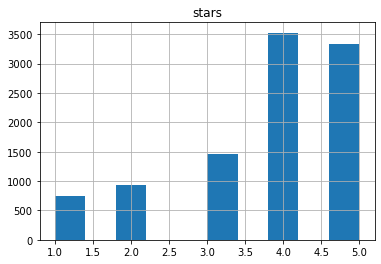

In [19]:
%matplotlib inline


df_final.hist(column='stars')



### Generate sentiment analysis score as features from this review text 

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\张馨予\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
# Transfer type of data from DataFrame into dictionary and preprocess the text for later sentiment intensity analysis

import re
PATTERN = r'[^a-zA]' 
df_senti = df_final[['review_id','text_x']]
senti=df_senti.to_dict('records') 
for cell in senti: 
    cell_1 = cell['text_x'].replace('\n','').replace('\n\n','').lower()
    cell_2 = re.sub(PATTERN,r' ',cell_1)
    cell_2_no_punc= cell_2.translate(str.maketrans('','', string.punctuation))
    ss = sid.polarity_scores(cell_2_no_punc)
    cell.update(ss)

In [22]:
# Generate sentiment intensity scores for each review as the review's features.
# For each, a positve score, a negative score and a neutral score will be generated and assigned based on the content of each review.
# A feature named compound is generated by summing up the positive, negative and neutral scores.

df_senti_score=pd.DataFrame.from_dict(senti)
df_final_2 = pd.merge(df_final, df_senti_score,  how='outer',on = 'review_id')
df_final_2 = df_final_2.drop(['Unnamed: 0', 'text_x_y'], axis=1)

In [23]:
df_final_2.head(3)

,review_id,stars,text_x_x,clean_text,number_puncuation,number_raw_wrds,number_wrds,number_adj,number_noun,number_verb,neg,neu,pos,compound
0,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,"['wife', 'took', 'birthday', 'breakfast', 'exc...",14,175,71,19,27,35,0.015,0.688,0.297,0.9950
1,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,"['idea', 'people', 'give', 'reviews', 'place',...",21,286,98,19,48,53,0.055,0.735,0.210,0.9939
2,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,"['love', 'gyro', 'plate', 'rice', 'good', 'als...",3,18,8,1,5,3,0.000,0.602,0.398,0.8377


In [24]:
df_final_4 = df_final_2.dropna()
df_final_4.columns
df_final_4.head(3)

# For each review, there are 10 features generated including number_puncuation, number_raw_wrds, number_wrds, number_adj, number_noun, number_verb, neg (negative score), neu (neutral score), pos (positive score), compound (the sum of three sentiment scores)
# These ten features would be the input for models tuned later.

,review_id,stars,text_x_x,clean_text,number_puncuation,number_raw_wrds,number_wrds,number_adj,number_noun,number_verb,neg,neu,pos,compound
0,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,"['wife', 'took', 'birthday', 'breakfast', 'exc...",14,175,71,19,27,35,0.015,0.688,0.297,0.9950
1,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,"['idea', 'people', 'give', 'reviews', 'place',...",21,286,98,19,48,53,0.055,0.735,0.210,0.9939
2,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,"['love', 'gyro', 'plate', 'rice', 'good', 'als...",3,18,8,1,5,3,0.000,0.602,0.398,0.8377


In [25]:
df_final_4['stars'].value_counts() 

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

### Features visualization.

In [26]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

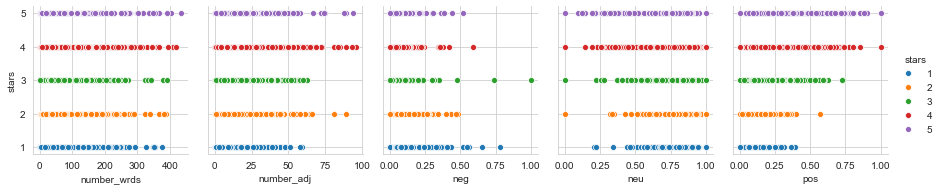

In [27]:
# To visulize the distribution of features among reviews with different stars.

sns.pairplot(data = df_final_4, hue='stars', y_vars=['stars'], x_vars=['number_wrds', 'number_adj','neg', 'neu', 'pos' ])

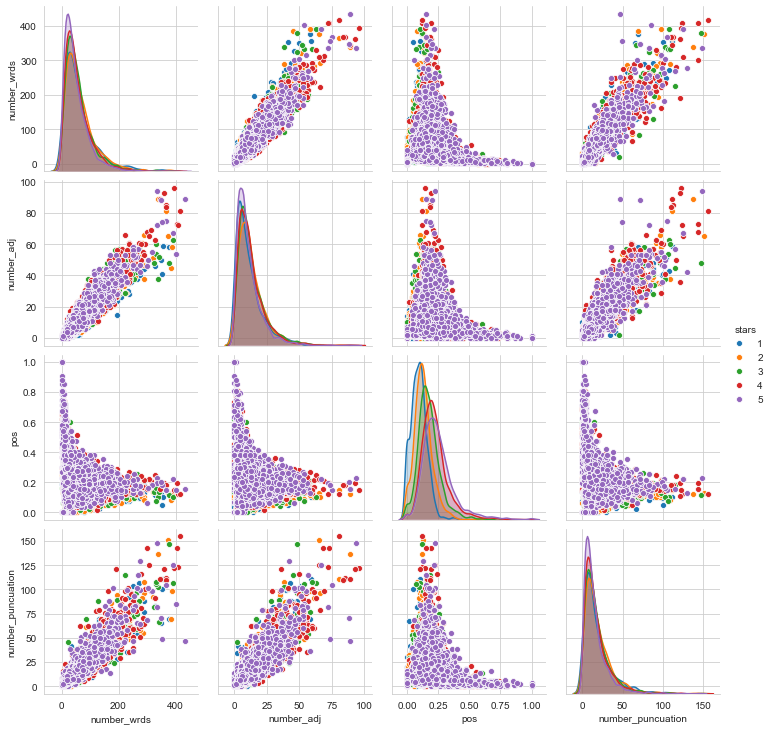

In [28]:
sns.pairplot(df_final_4[['stars','number_wrds', 'number_adj', 'pos','number_puncuation']], hue='stars')

In [29]:
df_final_4.head()

,review_id,stars,text_x_x,clean_text,number_puncuation,number_raw_wrds,number_wrds,number_adj,number_noun,number_verb,neg,neu,pos,compound
0,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,"['wife', 'took', 'birthday', 'breakfast', 'exc...",14,175,71,19,27,35,0.015,0.688,0.297,0.9950
1,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,"['idea', 'people', 'give', 'reviews', 'place',...",21,286,98,19,48,53,0.055,0.735,0.210,0.9939
2,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,"['love', 'gyro', 'plate', 'rice', 'good', 'als...",3,18,8,1,5,3,0.000,0.602,0.398,0.8377
3,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...","['rosie', 'dakota', 'love', 'chaparral', 'park...",16,93,36,6,28,12,0.000,0.814,0.186,0.9360
4,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,"['general', 'manager', 'scott', 'petello', 'go...",17,109,32,6,22,18,0.031,0.648,0.321,0.9848


In [30]:
df_final_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          10000 non-null  object 
 1   stars              10000 non-null  int64  
 2   text_x_x           10000 non-null  object 
 3   clean_text         10000 non-null  object 
 4   number_puncuation  10000 non-null  int64  
 5   number_raw_wrds    10000 non-null  int64  
 6   number_wrds        10000 non-null  int64  
 7   number_adj         10000 non-null  int64  
 8   number_noun        10000 non-null  int64  
 9   number_verb        10000 non-null  int64  
 10  neg                10000 non-null  float64
 11  neu                10000 non-null  float64
 12  pos                10000 non-null  float64
 13  compound           10000 non-null  float64
dtypes: float64(4), int64(7), object(3)
memory usage: 1.5+ MB


In [32]:
# Generate Y variable 
# Y would be a zero-one variable. Set Y=1 when the star of review >= 3 (indicate the review is a positive review), otherwise Y=0.

df_final_4['y'] = 0 
a = list(range(9961))

for n in a:
    if df_final_4['stars'][n] >= 3:
        df_final_4['y'][n] = 1

<ipython-input-32-2ea2d8c35819>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_4['null_v'][n] = 1


In [33]:
Y = df_final_4['y']
X = df_final_4.drop(['stars','y','review_id','text_x_x','clean_text'], axis=1)
# Y
# X

In [34]:
from sklearn import preprocessing 


## Logistic Regression 


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

log_reg = LogisticRegression()
log_reg_multiNM = LogisticRegression(multi_class='multinomial',solver ='lbfgs')

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.5,random_state=0)

log_reg.fit(X_train, Y_train)
#log_reg_multiNM.fit(X_train, Y_train)


from sklearn import metrics

Y_pred = log_reg.predict(X_test)
#Y_pred_NM = log_reg_multiNM.predict(X_test)

print(metrics.accuracy_score(Y_test, Y_pred))
#print(metrics.accuracy_score(Y_test,Y_pred_NM))

0.8682995382453322
0.8705079301345111


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

## Decision tree 

In [87]:
# # training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0)
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, Y_train) 
dtree_predictions = dtree_model.predict(X_test) 
accuracy_dtree = dtree_model.score(X_test,Y_test)
print(accuracy_dtree)

0.8594941790445604


In [ ]:
ac2 = []
ran2 = list(range(2,10))
for n in ran2:
    dtree_model = DecisionTreeClassifier(max_depth = n).fit(X_train, Y_train) 
    accuracy_dtree = dtree_model.score(X_test,Y_test)
    ac2.append(accuracy_dtree)
print (ac2)   

In [ ]:
import matplotlib.pyplot as plt
x2 = ran2
y2 = ac2
plt.plot(x2,y2)

## SVM (Support Vector Machine)

In [81]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, Y_train) 
#svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy_svm = svm_model_linear.score(X_test, Y_test) 
print(accuracy_svm) 

0.8645


In [83]:
accuracy = []
ran = list(range(-5,5))
for n in ran:
    svm_model_linear = SVC(kernel = 'linear', C = 10**n).fit(X_train, Y_train) 
    svm_predictions = svm_model_linear.predict(X_test) 
    accuracy_svm = svm_model_linear.score(X_test, Y_test)
    accuracy.append(accuracy_svm)

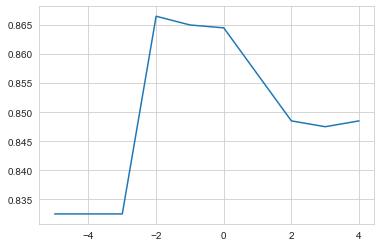

In [84]:
import matplotlib.pyplot as plt
x0 = ran
y0 = accuracy
plt.plot(x0,y0)

## KNN 

In [95]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, Y_train) 
  
# accuracy on X_test 
accuracy_Knn = knn.score(X_test, Y_test) 
print (accuracy_Knn)
  
# creating a confusion matrix 
# knn_predictions = knn.predict(X_test)  
# cm = confusion_matrix(Y_test, knn_predictions)  7 025 



### k 7 acu 0.25 


0.811841445057702


In [97]:
ac1 = []
ran1 = list(range(1,200))
for n in ran1:
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train, Y_train) 
    accuracy_Knn = knn.score(X_test, Y_test) 
    ac1.append(accuracy_Knn)

[0.7571500250878074, 0.6874059207225288, 0.811841445057702, 0.7722027094831911, 0.8228800802809835, 0.8133467134972403, 0.8278976417461114, 0.8178625188158555, 0.8309081786251882, 0.8258906171600602, 0.831409934771701, 0.8283993978926242, 0.8354239839438033, 0.8329152032112394, 0.8374310085298545, 0.8344204716507777, 0.8384345208228801, 0.8379327646763672, 0.8369292523833417, 0.8374310085298545, 0.8354239839438033, 0.8364274962368289, 0.8364274962368289, 0.8359257400903161, 0.8354239839438033, 0.8354239839438033, 0.8354239839438033, 0.8354239839438033, 0.8359257400903161, 0.8359257400903161, 0.8354239839438033, 0.8344204716507777, 0.8339187155042649, 0.8354239839438033, 0.8339187155042649, 0.8349222277972905, 0.8344204716507777, 0.8349222277972905, 0.8344204716507777, 0.8349222277972905, 0.8344204716507777, 0.8344204716507777, 0.8339187155042649, 0.8339187155042649, 0.8334169593577522, 0.8334169593577522, 0.8334169593577522, 0.8334169593577522, 0.8334169593577522, 0.8334169593577522, 0

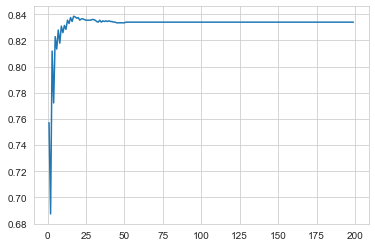

In [100]:
import matplotlib.pyplot as plt
x1 = ran1
y1 = ac1
plt.plot(x1,y1)

In [102]:
ac2 = []
ran2 = list(range(10,50))
for n in ran2:
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train, Y_train) 
    accuracy_Knn = knn.score(X_test, Y_test) 
    ac2.append(accuracy_Knn)


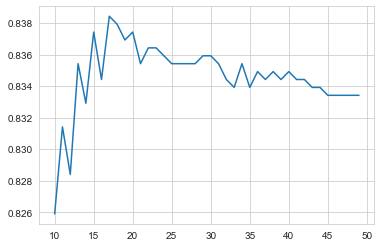

In [103]:
x2 = ran2
y2 = ac2
plt.plot(x2,y2)

In [108]:
print ('The largest accuracy of KNN model is ',round(ac1[16],2), 'when number of neighbors is 16')

The largest accuracy of KNN model is  0.84 when number of neighbors is 16


In [51]:
## change the nunber of neighbors and compare the accuracy 

## Naive Bayes 

In [90]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, Y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy_GNB = gnb.score(X_test, Y_test) 
print (accuracy_GNB)  
# # creating a confusion matrix 
# cm = confusion_matrix(y_test, gnb_predictions) 

0.8402248093135287


In [91]:
# https://scikit-learn.org/stable/modules/multiclass.html 

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
logreg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
logreg.fit(X_train, Y_train)


 
# Train model
clf_0 = LogisticRegression().fit(X, Y)
 
# Predict on training set
pred_y_0 = clf_0.predict(X) 

# How's the accuracy?
print( metrics.accuracy_score(pred_y_0, Y) ) 

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test))) ## 44%

0.8706957132817991
Accuracy of logistic regression classifier on test set: 0.88


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random Forest Model 

In [93]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

review_random_forest = RandomForestClassifier(random_state=6)
review_random_forest.fit(X_train, Y_train)
print(f"Random Forest: {review_random_forest.score(X_train, Y_train)}")
# Random Forest: 0.9998278533310381
print(f"Random Forest: {review_random_forest.score(X_test, Y_test)}")
# Random Forest: 0.874

# Tuning Hyperparameters: n_estimators, max_features, min_sample_leaf
# https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/

Random Forest: 0.9998744979919679
Random Forest: 0.8615153035624686


## Regularization for the logistic regression model

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)

weights, params = [], []

for c in np.arange(-5,5, dtype = float):
    lr = LogisticRegression(C = 10**c, random_state = 0)
    lr.fit(X_train, Y_train)
    weights.append(lr.coef_[0])
    params.append(10**c)

weights = np.array(weights)

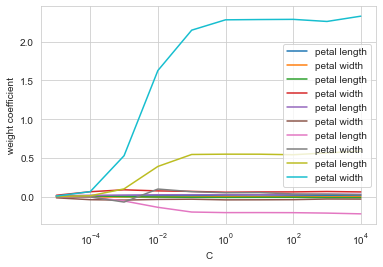

In [57]:
plot(params, weights[:,0], label = 'number of punctuations')
plot(params, weights[:,1], label = 'number of raw words')
plot(params, weights[:,2], label = 'number of words')
plot(params, weights[:,3], label = 'number of adjective words')
plot(params, weights[:,4], label = 'number of nouns')
plot(params, weights[:,5], label = 'number of verbs')
plot(params, weights[:,6], label = 'negtive')
plot(params, weights[:,7], label = 'neutral')
plot(params, weights[:,8], label = 'positive')
plot(params, weights[:,9], label = 'compound')





ylabel('weight coefficient')
xlabel('C')
legend(loc = 'right')
xscale('log')

In [74]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

for i in range(0,len(df['stars'])-1):
    df['stars'][i] = int(df['stars'][i])

In [76]:
# separate into binary varialbes
df['negative'] = np.where(df['stars'] <= 2, 1, 0)
#data_1 = data[["text","positive"]]
#print(data_1.head())
df["text_cleaned"] = df["text"].str.replace('[^\w\s]','')
df["text_cleaned2"] = df["text_cleaned"].str.lower()
x = df['text_cleaned2']
y = df['negative']

In [77]:
# removing stop words and punctuation
porter = PorterStemmer()
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nopunc = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return [porter.stem(word.lower()) for word in nopunc]

In [78]:
# words -> vectors
vocab = CountVectorizer(analyzer=text_process,min_df = 0.005).fit(x)
#vocab = CountVectorizer(stop_words = stopwords.words('english'), lowercase=True, ngram_range=(1, 3)).fit(x)
#print(vocab.vocabulary_)
print(vocab.get_feature_names()[1:330])

['10', '100', '11', '12', '13', '14', '15', '18', '2', '20', '24', '25', '3', '30', '35', '4', '40', '45', '5', '50', '6', '60', '7', '8', '80', '9', '90', 'abl', 'absolut', 'accept', 'access', 'accommod', 'accompani', 'across', 'act', 'activ', 'actual', 'ad', 'add', 'addict', 'addit', 'admit', 'ador', 'adult', 'advantag', 'adventur', 'advic', 'afford', 'afternoon', 'age', 'ago', 'agre', 'ahead', 'air', 'airport', 'alcohol', 'allow', 'almost', 'alon', 'along', 'alreadi', 'alright', 'also', 'altern', 'although', 'alway', 'amaz', 'ambianc', 'ambienc', 'american', 'among', 'amount', 'anim', 'annoy', 'anoth', 'answer', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'anywher', 'apart', 'apolog', 'app', 'appar', 'appeal', 'appear', 'appet', 'appl', 'appoint', 'appreci', 'approach', 'appropri', 'area', 'arent', 'arizona', 'around', 'arriv', 'art', 'artichok', 'asada', 'asian', 'asid', 'ask', 'ass', 'assum', 'asu', 'ate', 'atmospher', 'attempt', 'attend', 'attent', 'attitud', 'attract', 'auth

In [79]:
x = vocab.transform(x)
#Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)
#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# DENSITY OF THE MATRIX
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

KeyboardInterrupt: 